In [1]:
from __future__ import print_function
import pandas as pd
import datetime
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
import io
import matplotlib.pyplot as plt


from ipywidgets import interact, interactive, fixed, interact_manual,Layout
import ipywidgets as widgets
from IPython.display import display,clear_output

%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'figure.figsize':[8,6],
                     'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## An overview of where the data is, is here

# Get the country data aggregated

In [2]:
response = requests.get('https://datahub.io/core/covid-19/r/countries-aggregated.csv')
file_object = io.StringIO(response.content.decode('utf-8'))
data=pd.read_csv(file_object)

In [3]:
countries=data.Country.values

## Plot the data

In [4]:
plt.ioff()
ax=plt.gca()

out=widgets.Output(layout=Layout(height='500px', width = '500px'))
w=widgets.SelectMultiple(
    options=list(countries),
    value=['Germany','Italy','China','US'],
    description='Country',
    disabled=False,
    rows=10
)
hbox=widgets.HBox(children=(out,w))
display(hbox)


def click(b):    
    ax.clear()
    for country in w.value:
        germany=data[data.Country==country]
        ax.plot(pd.to_datetime(germany['Date']),germany['Confirmed'],label=country)
        ax.set_xticklabels(germany['Date'].values[0:10],rotation=45)
        ax.set_xlabel('Date')
        ax.set_ylabel('# of Cases')
        ax.legend()
    with out:
        clear_output(wait=True)
        display(ax.figure)

w.observe(click)
click(None)

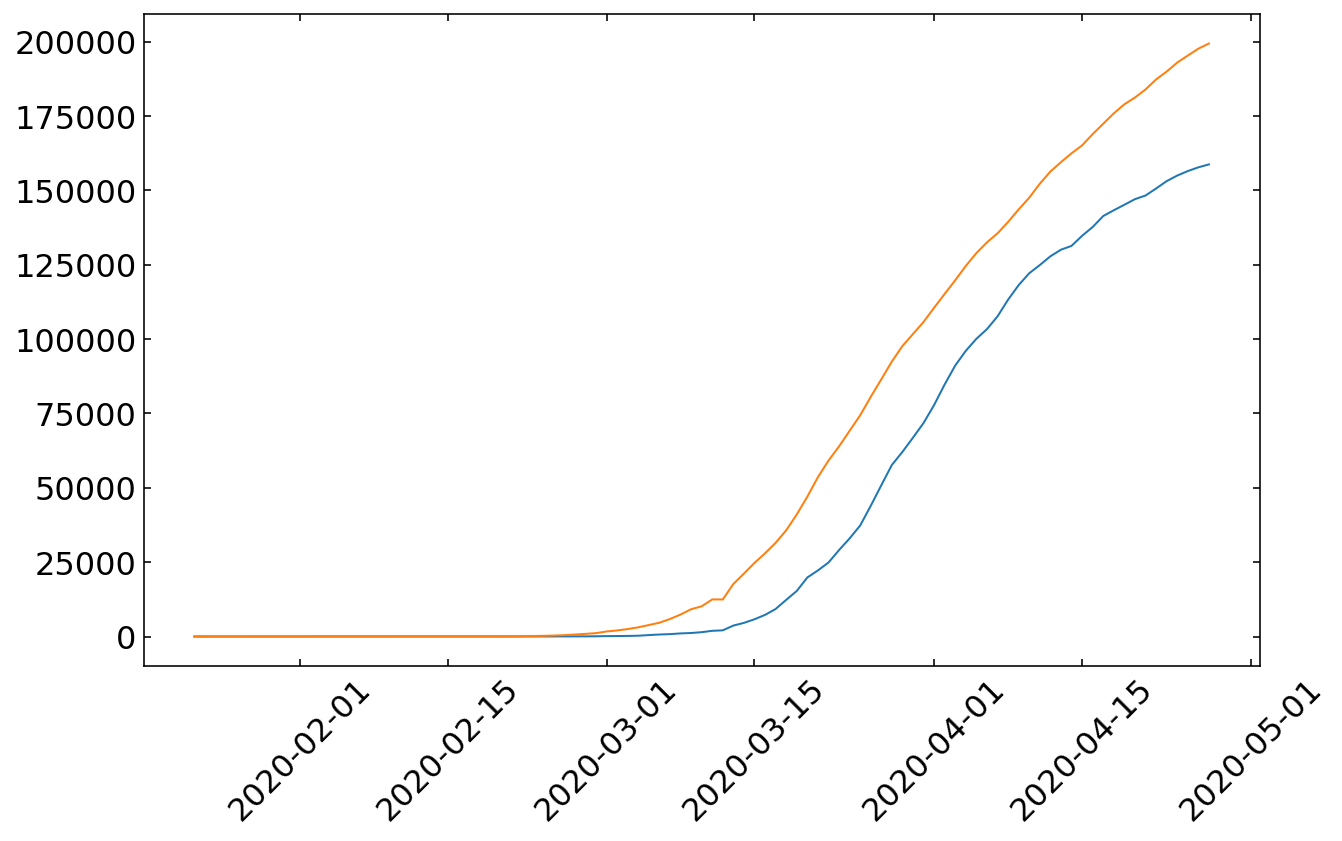

In [127]:
plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(germany['Date']),germany['Confirmed'])
plt.plot(pd.to_datetime(italy['Date']),italy['Confirmed'])
plt.xticks(rotation=45)
plt.show()

https://covid.ourworldindata.org/data/owid-covid-data.csv

https://github.com/owid/covid-19-data/blob/master/public/data/testing/covid-testing-all-observations.csv

In [334]:
response = requests.get("https://covid.ourworldindata.org/data/owid-covid-data.csv")
file_object = io.StringIO(response.content.decode('utf-8'))
data=pd.read_csv(file_object,error_bad_lines=False)